ALL MODELS DESCIRBED HERE RUN THE ENTIRE DATA PREP AND FEATURE ENGINEERING NOTEBOOKS 
ALSO RUNNING ON HOUR FREQUENCY 
BATCH SIZE 128
EPOCHS 25

sub 39 : 
        model_A = Sequential()

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l1_l2"))
        model_A.add(Dense(64, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 39: 
                64/64 [==============================] - 1s 8ms/step
                1095.9252690802348
                77/77 [==============================] - 1s 8ms/step
                108.4554586038961
                76/76 [==============================] - 3s 10ms/step
                91.25587557006634

sub 40: 
        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 40: 
                64/64 [==============================] - 0s 7ms/step
                997.0125978473582
                77/77 [==============================] - 0s 5ms/step
                112.36317978896103
                76/76 [==============================] - 4s 12ms/step
                74.19562992330016

sub 41: 

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 41: 
                64/64 [==============================] - 3s 12ms/step
                1141.0985812133072
                77/77 [==============================] - 2s 6ms/step
                114.32893668831169
                76/76 [==============================] - 3s 11ms/step
                93.95477041873964
                










In [2]:
%load_ext autoreload
%autoreload 2

# Notebook for running RNN model

RNN models (Recurent Neural Network) have LSTM neurons that hopefully can pick up on patterns evolving over time. 

In [3]:
import tensorflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [4]:
%store -r dm 
dm = dm


In [5]:
dm.combine_all_data()

['X_test_estimated_a', 'data_A']
['X_test_estimated_b', 'data_B']
['X_test_estimated_c', 'data_C']


In [6]:

from sklearn.model_selection import train_test_split


X_A_train = dm.data_A.iloc[:, 1:]
y_A_train = dm.data_A.iloc[:,0]
X_B_train = dm.data_B.iloc[:, 1:]
y_B_train = dm.data_B.iloc[:,0]
X_C_train = dm.data_C.iloc[:, 1:]
y_C_train = dm.data_C.iloc[:,0]

X_train = dm.data.iloc[:, 2:]
y_train = dm.data.iloc[:,1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = X_train.columns
locs = X_train["location"]
X_train = X_train.drop("location", axis=1)
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train["location"] = locs
X_train.columns = cols

X_train_A, X_validate_A, y_train_A, y_validate_A = train_test_split(X_A_train, y_A_train, shuffle=False, train_size=0.9)
#X_validate_A, X_test_A, y_validate_A, y_test_A = train_test_split(X_validate_A, y_validate_A, shuffle=False, test_size=0.3)

X_train_B, X_validate_B, y_train_B, y_validate_B = train_test_split(X_B_train, y_B_train, shuffle=False, train_size=0.9)
#X_validate_B, X_test_B, y_validate_B, y_test_B = train_test_split(X_validate_B, y_validate_B, shuffle=False, test_size=0.3)

X_train_C, X_validate_C, y_train_C, y_validate_C = train_test_split(X_C_train, y_C_train, shuffle=False, train_size=0.9)
#X_validate_C, X_test_C, y_validate_C, y_test_C = train_test_split(X_validate_C, y_validate_C, shuffle=False, test_size=0.3)

X, X_validate, y, y_validate = train_test_split(X_train, y_train, shuffle=False, train_size=0.8)

X_A_submission = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]
X_B_submission = dm.X_test_estimated_b[dm.X_test_estimated_b.columns.intersection(X_B_train.columns)]
X_C_submission = dm.X_test_estimated_c[dm.X_test_estimated_c.columns.intersection(X_C_train.columns)]
X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X_train.columns)]

print(X_train_A.shape, y_train_A.shape, X_validate_A.shape, y_validate_A.shape)
print(X_train_B.shape, y_train_B.shape, X_validate_B.shape, y_validate_B.shape)
print(X_train_C.shape, y_train_C.shape, X_validate_C.shape, y_validate_C.shape)

print(X_train.shape, y_train.shape, X_submission.shape)

X

(19354, 49) (19354,) (2151, 49) (2151,)
(13554, 49) (13554,) (1506, 49) (1506,)
(10997, 49) (10997,) (1222, 49) (1222,)
(48784, 48) (48784,) (2160, 48)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,month,hours,week_number,day_year,sum_rad:W,location
0,0.420420,0.310105,0.000000,0.000000,0.5,0.686839,0.000000,0.000000,0.000000,0.000000,...,0.319196,0.198100,0.441077,0.5,1.000000,0.066987,0.942728,0.936921,0.000000,0
1,0.420420,0.293554,0.000000,0.000000,0.5,0.686839,0.000000,0.000000,0.000000,0.000000,...,0.296875,0.210312,0.493266,0.5,1.000000,0.017037,0.942728,0.936921,0.000000,0
2,0.430931,0.280487,0.000000,0.000000,0.5,0.695065,0.000000,0.000000,0.000000,0.000000,...,0.270089,0.232022,0.525253,0.5,1.000000,0.000000,0.967508,0.941041,0.000000,0
3,0.463964,0.274390,0.000070,0.000898,0.5,0.719154,0.000896,0.000440,0.000000,0.000000,...,0.241071,0.251018,0.533670,0.5,1.000000,0.017037,0.967508,0.941041,0.000653,0
4,0.495495,0.274390,0.010857,0.027643,0.5,0.738543,0.035773,0.018417,0.000219,0.000116,...,0.225446,0.264586,0.537037,0.5,1.000000,0.066987,0.967508,0.941041,0.021901,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39022,0.376877,0.354530,0.561749,0.481003,0.5,0.656287,0.248170,0.255681,0.424971,0.499443,...,0.234375,0.428765,0.303030,0.5,0.933013,0.750000,0.942728,0.923788,0.482133,2
39023,0.382883,0.364982,0.404473,0.323760,0.5,0.660987,0.244735,0.247864,0.247256,0.338647,...,0.178571,0.430122,0.346801,0.5,0.933013,0.629410,0.942728,0.923788,0.324209,2
39024,0.402402,0.378920,0.251059,0.179112,0.5,0.675676,0.236594,0.242077,0.074407,0.162047,...,0.120536,0.421981,0.390572,0.5,0.933013,0.500000,0.942728,0.923788,0.173918,2
39025,0.429429,0.400697,0.120914,0.069228,0.5,0.693890,0.133308,0.186015,0.010609,0.042811,...,0.087054,0.402985,0.409091,0.5,0.933013,0.370590,0.942728,0.923788,0.068221,2


In [9]:
import helpers

deleted = helpers.drop_feature([X, X_validate, X_submission], ["snow_depth:cm", "snow_drift:idx", "snow_melt_10min:mm", "snow_water:kgm2", "month", "week_number", "wind_speed_10m:ms",	"wind_speed_u_10m:ms",	"wind_speed_w_1000hPa:ms", "sun_azimuth:d", "precip_5min:mm", "precip_type_5min:idx", "elevation:m", ])

X = deleted[0]
X_validate = deleted[1]
X_submission = deleted[2]

In [10]:
print(X.shape, y.shape, X_validate.shape, y_validate.shape, X_submission.shape)


(39027, 35) (39027,) (9757, 35) (9757,) (2160, 35)


In [11]:
import LSTM_class

model_number_features = X.shape[1]
model_number_timesteps = 1

super_model = LSTM_class.RNN_Network() ## initialize LSTM Class 
super_model.create_model(model_number_features, model_number_timesteps) ## builds model for A B and C, builds same for each 



2023-11-05 14:05:44.272171: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-05 14:05:44.272199: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-05 14:05:44.272213: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-05 14:05:44.272281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-05 14:05:44.272297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 512)            18432     
                                                                 
 dense_1 (Dense)             (None, 1, 256)            131328    
                                                                 
 dense_2 (Dense)             (None, 1, 256)            65792     
                                                                 
 dense_3 (Dense)             (None, 1, 128)            32896     
                                                                 
 dense_4 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_5 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_6 (Dense)             (None, 1, 64)             4

In [15]:

import optuna
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error

# 1. Define an objective function to be maximized.
def objective(trial):s
    model = Sequential()

    # 2. Suggest values of the hyperparameters using a trial object.
    model.add(
        Dense(units=trial.suggest_int('units', 128, 256, 2*256),
              activation=trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh']),
              activity_regularizer=trial.suggest_categorical('activity_regularizer', ['l1', 'l2', 'l1_l2'])
              ))
    model.add(
        Dropout(rate=trial.suggest_float('rate', 0.0, 1.0))
    )
    model.add(
        Dense(units=trial.suggest_int('units', 64, 128, 256),
              activation=trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh']),
              activity_regularizer=trial.suggest_categorical('activity_regularizer', ['l1', 'l2', 'l1_l2'])
              ))
    model.add(
        Dropout(rate=trial.suggest_float('rate', 0.0, 1.0))
    )
    model.add(
        Dense(units=trial.suggest_int('units', 32, 64, 128),
              activation=trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh']),
              activity_regularizer=trial.suggest_categorical('activity_regularizer', ['l1', 'l2', 'l1_l2'])
              ))
    model.add(
        Dropout(rate=trial.suggest_float('rate', 0.0, 1.0))
    )
    model.add(
        Dense(units=trial.suggest_int('units', 16, 32, 64),
              activation=trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh']),
              activity_regularizer=trial.suggest_categorical('activity_regularizer', ['l1', 'l2', 'l1_l2'])
              ))
    model.add(
        Dropout(rate=trial.suggest_float('rate', 0.0, 1.0))
    )
    model.add(
        Dense(units=trial.suggest_int('units', 1, 16, 32),
              activation=trial.suggest_categorical('activation', ['relu', 'sigmoid', 'tanh']),
              activity_regularizer=trial.suggest_categorical('activity_regularizer', ['l1', 'l2', 'l1_l2'])
              ))

    # We compile our model with a sampled learning rate.
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model.compile(loss='mean_absolute_error', optimizer=RMSprop(lr=lr))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_validate)
    return mean_absolute_error(y_pred, y_validate)

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-11-05 14:33:03,119] A new study created in memory with name: no-name-46ab4926-d375-468a-8ba5-19537589d76a
/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [128, 256] and step=512, but the range is not divisible by `step`. It will be replaced by [128, 128].
  warnings.warn(
/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [64, 128] and step=256, but the range is not divisible by `step`. It will be replaced by [64, 64].
  warnings.warn(
/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:677: RuntimeWarning: Inconsistent parameter values for distribution with name "units"! This might be a con

 382/1525 [======>.......................] - ETA: 4:00 - loss: 1545.1412

[W 2023-11-05 14:34:32,659] Trial 0 failed with parameters: {'units': 128, 'activation': 'relu', 'activity_regularizer': 'l1_l2', 'rate': 0.5961154737409339, 'lr': 2.7870626407660232e-05} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_23271/806594817.py", line 53, in objective
    model.fit(X_train, y_train)
  File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/

KeyboardInterrupt: 

In [157]:
#super_model.fit_model(super_model.model_A, X_train_A, y_train_A)
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=15,
    max_train_size=18000,
    test_size=3000,
)

all_splits = list(ts_cv.split(X, y))




super_model.fit_model_timeseries(super_model.model_A, all_splits, X, y, training_parameters={"epochs":100, "batch_size":2*128, "timesteps":model_number_timesteps})


  0%|          | 0/100 [00:00<?, ?it/s]

71/71 [==============================] - 33s 468ms/step - loss: 97.5426 - val_loss: 67.3786


  1%|          | 1/100 [03:11<5:15:44, 191.36s/it]

71/71 [==============================] - 33s 467ms/step - loss: 97.6886 - val_loss: 72.2428


  2%|▏         | 2/100 [05:55<4:45:58, 175.08s/it]

71/71 [==============================] - 33s 463ms/step - loss: 97.3991 - val_loss: 67.7373


  3%|▎         | 3/100 [08:38<4:34:23, 169.72s/it]

71/71 [==============================] - 33s 459ms/step - loss: 96.6984 - val_loss: 67.6857


  4%|▍         | 4/100 [11:20<4:26:27, 166.53s/it]

71/71 [==============================] - 32s 451ms/step - loss: 96.4568 - val_loss: 67.4358


  5%|▌         | 5/100 [14:01<4:20:31, 164.54s/it]

71/71 [==============================] - 33s 467ms/step - loss: 97.0581 - val_loss: 67.5588


  6%|▌         | 6/100 [16:46<4:18:23, 164.93s/it]

71/71 [==============================] - 33s 470ms/step - loss: 96.7786 - val_loss: 67.3932


  7%|▋         | 7/100 [19:32<4:16:07, 165.24s/it]

71/71 [==============================] - 33s 461ms/step - loss: 97.4107 - val_loss: 67.1233


  8%|▊         | 8/100 [22:17<4:13:01, 165.02s/it]

71/71 [==============================] - 32s 454ms/step - loss: 96.4405 - val_loss: 67.7183


  9%|▉         | 9/100 [24:58<4:08:28, 163.83s/it]

71/71 [==============================] - 32s 453ms/step - loss: 96.2191 - val_loss: 67.2140


 10%|█         | 10/100 [27:39<4:04:18, 162.87s/it]

71/71 [==============================] - 32s 449ms/step - loss: 96.4199 - val_loss: 67.3074


 11%|█         | 11/100 [30:18<3:59:48, 161.67s/it]

71/71 [==============================] - 32s 447ms/step - loss: 96.5165 - val_loss: 67.0471


 12%|█▏        | 12/100 [32:57<3:56:10, 161.03s/it]

71/71 [==============================] - 32s 453ms/step - loss: 97.5703 - val_loss: 67.3177


 13%|█▎        | 13/100 [35:39<3:53:43, 161.19s/it]

71/71 [==============================] - 32s 457ms/step - loss: 97.7828 - val_loss: 67.2043


 14%|█▍        | 14/100 [38:20<3:51:05, 161.23s/it]

71/71 [==============================] - 32s 453ms/step - loss: 98.2202 - val_loss: 67.1136


 15%|█▌        | 15/100 [41:00<3:48:06, 161.01s/it]

71/71 [==============================] - 33s 469ms/step - loss: 96.8414 - val_loss: 67.3712


 16%|█▌        | 16/100 [43:44<3:46:36, 161.86s/it]

71/71 [==============================] - 32s 449ms/step - loss: 96.2989 - val_loss: 66.9562


 17%|█▋        | 17/100 [46:24<3:43:03, 161.25s/it]

71/71 [==============================] - 32s 451ms/step - loss: 96.0770 - val_loss: 67.1018


 18%|█▊        | 18/100 [49:03<3:39:25, 160.56s/it]

71/71 [==============================] - 32s 451ms/step - loss: 98.3721 - val_loss: 66.9619


 19%|█▉        | 19/100 [51:44<3:36:47, 160.58s/it]

71/71 [==============================] - 32s 448ms/step - loss: 96.7602 - val_loss: 67.0940


 20%|██        | 20/100 [54:25<3:34:12, 160.66s/it]

71/71 [==============================] - 31s 442ms/step - loss: 97.7685 - val_loss: 67.1928


 21%|██        | 21/100 [57:04<3:31:08, 160.36s/it]

71/71 [==============================] - 32s 446ms/step - loss: 97.4148 - val_loss: 67.1064


 22%|██▏       | 22/100 [59:43<3:27:58, 159.98s/it]

71/71 [==============================] - 31s 444ms/step - loss: 96.2179 - val_loss: 67.0977


 23%|██▎       | 23/100 [1:02:22<3:24:48, 159.59s/it]

71/71 [==============================] - 33s 469ms/step - loss: 97.8689 - val_loss: 67.0142


 24%|██▍       | 24/100 [1:05:03<3:22:50, 160.14s/it]

71/71 [==============================] - 1029s 15s/step - loss: 96.8199 - val_loss: 67.3938


 25%|██▌       | 25/100 [1:39:49<15:22:19, 737.86s/it]

71/71 [==============================] - 32s 444ms/step - loss: 96.3578 - val_loss: 66.9882


 26%|██▌       | 26/100 [1:57:42<17:13:50, 838.25s/it]

71/71 [==============================] - 32s 444ms/step - loss: 96.3358 - val_loss: 67.0929


 27%|██▋       | 27/100 [2:15:45<18:29:21, 911.81s/it]

71/71 [==============================] - 31s 444ms/step - loss: 97.0744 - val_loss: 67.0287


 28%|██▊       | 28/100 [2:22:21<15:08:30, 757.09s/it]

71/71 [==============================] - 31s 444ms/step - loss: 96.2459 - val_loss: 66.9476


 29%|██▉       | 29/100 [2:42:27<17:35:07, 891.66s/it]

71/71 [==============================] - 32s 447ms/step - loss: 97.8813 - val_loss: 67.2897


 30%|███       | 30/100 [2:53:59<16:10:38, 831.98s/it]

71/71 [==============================] - 32s 446ms/step - loss: 96.3981 - val_loss: 66.9507


 31%|███       | 31/100 [3:05:07<15:00:05, 782.69s/it]

71/71 [==============================] - 738s 11s/step - loss: 96.5087 - val_loss: 67.2304


 32%|███▏      | 32/100 [3:22:12<16:09:15, 855.22s/it]

71/71 [==============================] - 31s 444ms/step - loss: 98.6896 - val_loss: 67.8843


 33%|███▎      | 33/100 [3:28:21<13:12:10, 709.41s/it]

71/71 [==============================] - 31s 443ms/step - loss: 97.0730 - val_loss: 67.2152


 34%|███▍      | 34/100 [3:46:11<14:59:17, 817.54s/it]

71/71 [==============================] - 31s 439ms/step - loss: 97.4927 - val_loss: 66.9755


 35%|███▌      | 35/100 [3:55:50<13:28:19, 746.15s/it]

71/71 [==============================] - 32s 444ms/step - loss: 97.3060 - val_loss: 67.0511


 36%|███▌      | 36/100 [4:14:29<15:15:07, 857.93s/it]

71/71 [==============================] - 33s 459ms/step - loss: 96.2741 - val_loss: 67.2182


 37%|███▋      | 37/100 [4:24:26<13:38:41, 779.70s/it]

71/71 [==============================] - 32s 447ms/step - loss: 97.0703 - val_loss: 67.0489


 38%|███▊      | 38/100 [4:43:11<15:12:38, 883.21s/it]

71/71 [==============================] - 32s 449ms/step - loss: 96.9311 - val_loss: 67.0134


 39%|███▉      | 39/100 [5:03:37<16:42:27, 986.03s/it]

71/71 [==============================] - 32s 446ms/step - loss: 96.6018 - val_loss: 67.3540


 40%|████      | 40/100 [5:22:03<17:02:02, 1022.05s/it]

71/71 [==============================] - 32s 459ms/step - loss: 96.4927 - val_loss: 66.9876


 41%|████      | 41/100 [5:25:58<12:52:52, 785.97s/it] 

71/71 [==============================] - 1068s 15s/step - loss: 97.7115 - val_loss: 66.9960


 42%|████▏     | 42/100 [6:01:45<19:14:23, 1194.20s/it]

71/71 [==============================] - 32s 447ms/step - loss: 97.9593 - val_loss: 67.0079


 43%|████▎     | 43/100 [6:04:24<13:59:28, 883.67s/it] 

71/71 [==============================] - 32s 458ms/step - loss: 97.6228 - val_loss: 67.2887


 44%|████▍     | 44/100 [6:22:59<14:49:41, 953.25s/it]

71/71 [==============================] - 33s 462ms/step - loss: 95.9957 - val_loss: 67.5167


 45%|████▌     | 45/100 [6:26:35<11:11:02, 732.05s/it]

71/71 [==============================] - 32s 446ms/step - loss: 98.2368 - val_loss: 67.0047


 46%|████▌     | 46/100 [6:46:56<13:10:48, 878.68s/it]

71/71 [==============================] - 31s 442ms/step - loss: 97.9789 - val_loss: 67.0283


 47%|████▋     | 47/100 [7:04:51<13:48:13, 937.61s/it]

71/71 [==============================] - 31s 445ms/step - loss: 98.1302 - val_loss: 67.2735


 48%|████▊     | 48/100 [7:07:28<10:09:40, 703.48s/it]

71/71 [==============================] - 31s 442ms/step - loss: 96.9490 - val_loss: 67.8449


 49%|████▉     | 49/100 [7:10:05<7:38:27, 539.37s/it] 

71/71 [==============================] - 32s 448ms/step - loss: 96.3962 - val_loss: 67.8164


 50%|█████     | 50/100 [7:12:42<5:54:01, 424.83s/it]

71/71 [==============================] - 32s 445ms/step - loss: 96.8239 - val_loss: 67.2027


 51%|█████     | 51/100 [7:15:20<4:41:35, 344.80s/it]

71/71 [==============================] - 32s 454ms/step - loss: 97.4504 - val_loss: 67.0862


 52%|█████▏    | 52/100 [7:18:00<3:51:26, 289.31s/it]

71/71 [==============================] - 937s 13s/step - loss: 97.9577 - val_loss: 67.5020


 53%|█████▎    | 53/100 [7:57:54<12:01:02, 920.49s/it]

71/71 [==============================] - 33s 461ms/step - loss: 97.9464 - val_loss: 67.0131


 54%|█████▍    | 54/100 [8:00:37<8:51:32, 693.31s/it] 

71/71 [==============================] - 31s 443ms/step - loss: 98.1393 - val_loss: 67.7817


 55%|█████▌    | 55/100 [8:19:55<10:24:34, 832.76s/it]

71/71 [==============================] - 32s 445ms/step - loss: 97.4090 - val_loss: 67.0166


 56%|█████▌    | 56/100 [8:26:36<8:35:46, 703.34s/it] 

71/71 [==============================] - 32s 447ms/step - loss: 97.6096 - val_loss: 67.4355


 57%|█████▋    | 57/100 [8:34:59<7:40:56, 643.18s/it]

71/71 [==============================] - 33s 460ms/step - loss: 96.8070 - val_loss: 67.4503


 58%|█████▊    | 58/100 [8:53:26<9:07:42, 782.44s/it]

71/71 [==============================] - 33s 465ms/step - loss: 97.6460 - val_loss: 67.1197


 59%|█████▉    | 59/100 [9:11:26<9:55:34, 871.57s/it]

71/71 [==============================] - 33s 469ms/step - loss: 97.7613 - val_loss: 67.0892


 60%|██████    | 60/100 [9:29:51<10:27:46, 941.67s/it]

71/71 [==============================] - 33s 466ms/step - loss: 97.2780 - val_loss: 67.6823


 61%|██████    | 61/100 [9:32:36<7:40:36, 708.63s/it] 

71/71 [==============================] - 34s 477ms/step - loss: 97.2781 - val_loss: 67.2685


 62%|██████▏   | 62/100 [9:35:23<5:45:50, 546.07s/it]

71/71 [==============================] - 34s 474ms/step - loss: 97.6288 - val_loss: 67.1355


 63%|██████▎   | 63/100 [9:38:11<4:26:52, 432.76s/it]

71/71 [==============================] - 33s 460ms/step - loss: 98.5943 - val_loss: 67.2942


 64%|██████▍   | 64/100 [9:40:58<3:31:48, 353.00s/it]

71/71 [==============================] - 33s 461ms/step - loss: 96.2944 - val_loss: 67.3850


 65%|██████▌   | 65/100 [9:43:41<2:52:41, 296.03s/it]

71/71 [==============================] - 940s 13s/step - loss: 97.2670 - val_loss: 67.2539


 66%|██████▌   | 66/100 [10:01:32<4:59:23, 528.34s/it]

71/71 [==============================] - 32s 458ms/step - loss: 96.8775 - val_loss: 67.4079


 67%|██████▋   | 67/100 [10:19:16<6:19:02, 689.16s/it]

71/71 [==============================] - 32s 456ms/step - loss: 96.7027 - val_loss: 67.5203


 68%|██████▊   | 68/100 [10:22:00<4:43:30, 531.59s/it]

71/71 [==============================] - 33s 461ms/step - loss: 96.9438 - val_loss: 67.2627


 69%|██████▉   | 69/100 [10:24:43<3:37:27, 420.89s/it]

71/71 [==============================] - 32s 447ms/step - loss: 97.7601 - val_loss: 67.0303


 70%|███████   | 70/100 [10:27:24<2:51:29, 342.97s/it]

71/71 [==============================] - 32s 452ms/step - loss: 96.9636 - val_loss: 67.3646


 71%|███████   | 71/100 [10:30:02<2:18:56, 287.46s/it]

71/71 [==============================] - 32s 445ms/step - loss: 98.0871 - val_loss: 67.7646


 72%|███████▏  | 72/100 [10:32:40<1:56:03, 248.68s/it]

71/71 [==============================] - 32s 447ms/step - loss: 96.7238 - val_loss: 67.5804


 73%|███████▎  | 73/100 [10:50:56<3:46:15, 502.79s/it]

71/71 [==============================] - 32s 446ms/step - loss: 96.9805 - val_loss: 67.1952


 74%|███████▍  | 74/100 [11:08:59<4:53:21, 676.97s/it]

71/71 [==============================] - 31s 443ms/step - loss: 97.9071 - val_loss: 67.0990


 75%|███████▌  | 75/100 [11:11:36<3:37:01, 520.85s/it]

71/71 [==============================] - 32s 448ms/step - loss: 97.3244 - val_loss: 67.4665


 76%|███████▌  | 76/100 [11:14:13<2:44:47, 411.97s/it]

71/71 [==============================] - 32s 448ms/step - loss: 97.4613 - val_loss: 67.3543


 77%|███████▋  | 77/100 [11:16:51<2:08:38, 335.59s/it]

71/71 [==============================] - 32s 458ms/step - loss: 97.9654 - val_loss: 67.8954


 78%|███████▊  | 78/100 [11:19:32<1:43:51, 283.25s/it]

71/71 [==============================] - 32s 450ms/step - loss: 97.4262 - val_loss: 67.0205


 79%|███████▉  | 79/100 [11:22:14<1:26:24, 246.87s/it]

71/71 [==============================] - 33s 459ms/step - loss: 96.5787 - val_loss: 67.4109


 80%|████████  | 80/100 [11:41:25<2:52:42, 518.11s/it]

71/71 [==============================] - 32s 456ms/step - loss: 96.2973 - val_loss: 67.3337


 81%|████████  | 81/100 [11:59:19<3:36:55, 685.05s/it]

71/71 [==============================] - 33s 461ms/step - loss: 97.4407 - val_loss: 67.1536


 82%|████████▏ | 82/100 [12:17:15<4:00:39, 802.21s/it]

71/71 [==============================] - 32s 457ms/step - loss: 96.8809 - val_loss: 67.3253


 83%|████████▎ | 83/100 [12:19:58<2:52:57, 610.47s/it]

71/71 [==============================] - 32s 457ms/step - loss: 97.0669 - val_loss: 67.1651


 84%|████████▍ | 84/100 [12:22:41<2:06:57, 476.07s/it]

71/71 [==============================] - 32s 454ms/step - loss: 97.7457 - val_loss: 67.4512


 85%|████████▌ | 85/100 [12:25:23<1:35:30, 382.05s/it]

71/71 [==============================] - 32s 449ms/step - loss: 96.3624 - val_loss: 67.5315


 86%|████████▌ | 86/100 [12:28:03<1:13:33, 315.28s/it]

71/71 [==============================] - 963s 14s/step - loss: 97.4447 - val_loss: 67.8499


 87%|████████▋ | 87/100 [12:46:13<1:58:40, 547.73s/it]

71/71 [==============================] - 31s 441ms/step - loss: 97.0561 - val_loss: 67.0596


 88%|████████▊ | 88/100 [12:48:51<1:26:11, 430.97s/it]

71/71 [==============================] - 32s 448ms/step - loss: 96.1812 - val_loss: 67.1995


 89%|████████▉ | 89/100 [13:07:02<1:55:15, 628.72s/it]

71/71 [==============================] - 32s 445ms/step - loss: 96.3182 - val_loss: 68.0847


 90%|█████████ | 90/100 [13:09:39<1:21:13, 487.38s/it]

71/71 [==============================] - 32s 453ms/step - loss: 97.0861 - val_loss: 67.1574


 91%|█████████ | 91/100 [13:12:19<58:20, 388.97s/it]  

71/71 [==============================] - 31s 444ms/step - loss: 96.7423 - val_loss: 67.1163


 92%|█████████▏| 92/100 [13:14:57<42:37, 319.72s/it]

71/71 [==============================] - 33s 459ms/step - loss: 96.2479 - val_loss: 67.0373


 93%|█████████▎| 93/100 [13:17:38<31:44, 272.06s/it]

71/71 [==============================] - 31s 441ms/step - loss: 96.3968 - val_loss: 67.1809


 94%|█████████▍| 94/100 [13:20:18<23:51, 238.56s/it]

71/71 [==============================] - 32s 448ms/step - loss: 96.3674 - val_loss: 68.4197


 95%|█████████▌| 95/100 [13:38:50<41:43, 500.74s/it]

71/71 [==============================] - 33s 463ms/step - loss: 96.7950 - val_loss: 67.0290


 96%|█████████▌| 96/100 [13:58:28<46:54, 703.66s/it]

71/71 [==============================] - 33s 460ms/step - loss: 96.9523 - val_loss: 67.0779


 97%|█████████▋| 97/100 [14:18:09<42:20, 846.89s/it]

71/71 [==============================] - 32s 457ms/step - loss: 98.5255 - val_loss: 67.3530


 98%|█████████▊| 98/100 [14:20:51<21:23, 641.59s/it]

71/71 [==============================] - 32s 458ms/step - loss: 96.9590 - val_loss: 67.0706


 99%|█████████▉| 99/100 [14:23:34<08:17, 497.96s/it]

71/71 [==============================] - 32s 456ms/step - loss: 97.2690 - val_loss: 67.2727


100%|██████████| 100/100 [14:26:16<00:00, 519.77s/it]


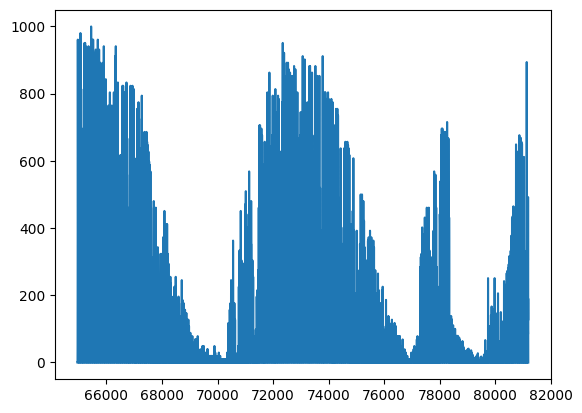

In [158]:
gt = y_validate

plt.plot(gt)
plt.show()



In [159]:

preds = super_model.model_A.predict((np.asarray(X_validate).reshape(int(X_validate.shape[0]/model_number_timesteps), model_number_timesteps, X_validate.shape[1])).astype(float))
gt = y_validate


508/508 [==============================] - 10s 16ms/step


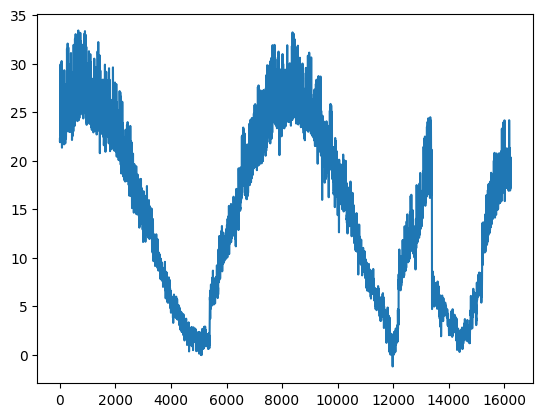

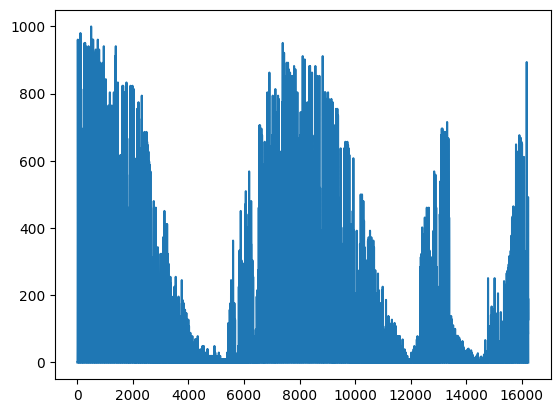

1734411.2085719565


In [160]:
from keras.losses import mean_absolute_error

plt.plot(np.asarray(preds).reshape((preds.shape[0], )))

plt.show()

gt = pd.DataFrame(gt)
gt = gt.reset_index().drop("index", axis=1)

plt.plot(gt)
plt.show()

error = mean_absolute_error(gt, preds)
print(np.sum(error)/error.shape[0])


## Testing our model locally

In [ ]:
## Specify the model to be used
pred_A = super_model.model_A.predict(np.asarray(X_A_submission).reshape((X_A_submission.shape[0], 1, X_A_submission.shape[1])).astype(float))
pred_B = super_model.model_A.predict(np.asarray(X_B_submission).reshape((X_B_submission.shape[0], 1, X_B_submission.shape[1])).astype(float))
pred_C = super_model.model_A.predict(np.asarray(X_C_submission).reshape((X_C_submission.shape[0], 1, X_C_submission.shape[1])).astype(float))

pred_A = pd.DataFrame(pred_A.reshape((720,)))
pred_B = pd.DataFrame(pred_B.reshape((720,)))
pred_C = pd.DataFrame(pred_C.reshape((720,)))

pred_A = dm.scaling(pred_A, "A")
pred_B = dm.scaling(pred_B, "B")
pred_C = dm.scaling(pred_C, "C")

test = pd.read_csv('test.csv')

df_mid = pd.concat([pred_A, pred_B], ignore_index=True)

df = pd.concat([df_mid, pred_C], join="inner", ignore_index=True)

# df[df<0] = 0

# NAME THE FILE 
df.to_csv("sub84.csv")


23/23 [==============================] - 0s 13ms/step
not emptu
not emptu
not emptu
